In [205]:
import pandas as pd
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,callbacks

import warnings
warnings.filterwarnings('ignore')

In [206]:
data=pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [207]:
y=data['Drug']
features=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X=data[features]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8,random_state=0)

In [208]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
object_cols=['Sex','BP','Cholesterol']
oe = OrdinalEncoder()

train_X[object_cols] = oe.fit_transform(train_X[object_cols])
test_X[object_cols] = oe.transform(test_X[object_cols])
train_y=le.fit_transform(train_y)
test_y=le.transform(test_y)

In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_X_sc = scaler.fit_transform(train_X)
test_X_sc=scaler.transform(test_X)

In [210]:
train_X_sc=pd.DataFrame(train_X_sc,columns=train_X.columns)
test_X_sc=pd.DataFrame(test_X_sc,columns=test_X.columns)

In [211]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=40,
    min_delta=0.001,
    restore_best_weights=True,
)

In [212]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=[5]),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

In [213]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_44 (Ba  (None, 5)                 20        
 tchNormalization)                                               
                                                                 
 dense_44 (Dense)            (None, 128)               768       
                                                                 
 batch_normalization_45 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_46 (Ba  (None, 256)             

In [214]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [215]:
history=model.fit(train_X_sc,train_y,
          validation_data=(test_X_sc,test_y),
          batch_size=50,
          epochs=200,
          callbacks=[early_stopping])

Epoch 1/200


4/4 [==============================] - 0s 33ms/step - loss: 2.0810 - accuracy: 0.2313 - val_loss: 1.5359 - val_accuracy: 0.6250
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2248 - accuracy: 0.5375 - val_loss: 1.4788 - val_accuracy: 0.7250
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.8486 - accuracy: 0.6313 - val_loss: 1.4405 - val_accuracy: 0.6500
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7590 - accuracy: 0.7563 - val_loss: 1.4065 - val_accuracy: 0.6250
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.7750 - val_loss: 1.3753 - val_accuracy: 0.5750
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6309 - accuracy: 0.7875 - val_loss: 1.3458 - val_accuracy: 0.5250
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.4628 - accuracy: 0.8313 - val_loss: 1.3233 - val_accuracy: 0.4750
Epoch 8/200
4/4 [=====================

In [216]:
model.evaluate(test_X_sc,test_y)

2/2 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9750


[0.075693778693676, 0.9750000238418579]

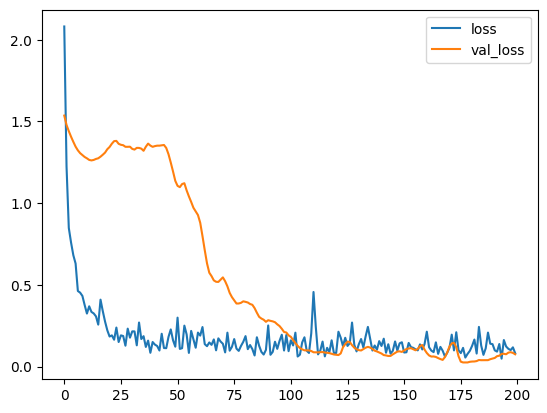

In [217]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

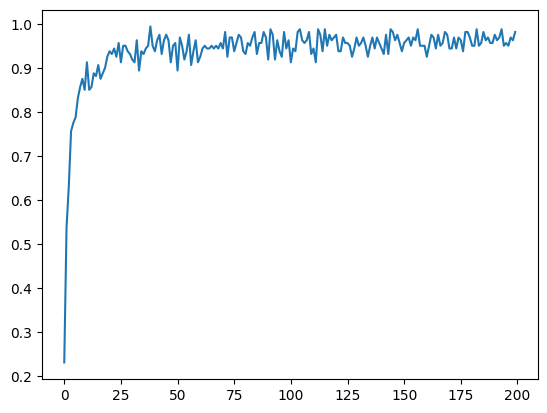

In [218]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])